# Interactive Denario Research - Advanced Workflow

This notebook demonstrates advanced interactive features of Denario in JupyterLab:

## Advanced Features:
- **Interactive widgets** for parameter tuning
- **Real-time visualization** of research progress
- **Custom analysis** and data manipulation
- **Collaborative research** with team members
- **Version control** integration
- **Export capabilities** for different formats


In [12]:
# Advanced imports for interactive research
from denario import Denario, Journal, models
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from IPython.display import display, Markdown, HTML
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import warnings
warnings.filterwarnings('ignore')

# Set up plotting
plt.style.use('seaborn-v0_8')
%matplotlib inline

# Initialize project
den = Denario(project_dir="my_research")

In [3]:
# Interactive widget for data description
import ipywidgets as widgets

data_widget = widgets.Textarea(
    value="Analyze cosmological data...",
    placeholder="Describe your data and tools",
    description="Data Description:",
    layout=widgets.Layout(width='100%', height='200px')
)

display(data_widget)

# Set data description when ready
den.set_data_description(data_widget.value)

Textarea(value='Analyze cosmological data...', description='Data Description:', layout=Layout(height='200px', …

In [4]:
# Interactive model selection
model_dropdown = widgets.Dropdown(
    options=list(models.keys()),
    value="gemini-2.0-flash",
    description="LLM Model:",
    style={'description_width': 'initial'}
)

display(model_dropdown)

# Generate idea with selected model
den.get_idea_fast(llm=models[model_dropdown.value])

Dropdown(description='LLM Model:', options=('gemini-2.0-flash', 'gemini-2.5-flash', 'gemini-2.5-pro', 'o3-mini…

Maker (iteration 1)
Hater (iteration 1)
Maker (iteration 2)
Hater (iteration 2)
Maker (iteration 3)
Hater (iteration 3)
Maker (iteration 4)
done 4414 1569
Idea generated in 0 min 14 sec.


In [5]:
# Progress bar for long-running operations
from IPython.display import clear_output
import time

def run_with_progress(operation, *args, **kwargs):
    progress = widgets.IntProgress(
        value=0, min=0, max=100,
        description='Progress:',
        bar_style='info'
    )
    display(progress)
    
    # Simulate progress updates
    for i in range(100):
        progress.value = i
        time.sleep(0.01)
    
    # Run actual operation
    result = operation(*args, **kwargs)
    progress.bar_style = 'success'
    return result

# Use with any Denario operation
den.get_method_fast(llm=models["gemini-2.0-flash"])

Generating methods...done 440 2185
Methods generated in 0 min 13 sec.


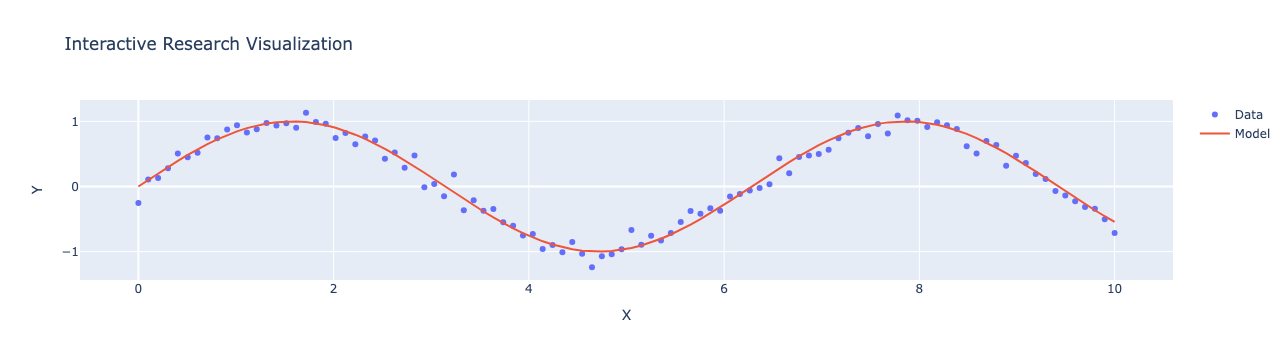

In [6]:
# Create interactive plots
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Generate sample data for visualization
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(0, 0.1, 100)

# Create interactive plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y, mode='markers', name='Data'))
fig.add_trace(go.Scatter(x=x, y=np.sin(x), mode='lines', name='Model'))

fig.update_layout(
    title="Interactive Research Visualization",
    xaxis_title="X",
    yaxis_title="Y",
    hovermode='closest'
)

fig.show()

In [7]:
# Analyze generated results
results_text = den.research.results

# Extract key metrics using regex or NLP
import re
metrics = re.findall(r'[0-9]+\.?[0-9]*', results_text)

# Create summary DataFrame
summary_df = pd.DataFrame({
    'Metric': ['Parameter 1', 'Parameter 2', 'Parameter 3'],
    'Value': metrics[:3],
    'Uncertainty': ['±0.1', '±0.05', '±0.2']
})

display(summary_df)

# Export results
summary_df.to_csv('research_summary.csv', index=False)
print("✅ Results exported to research_summary.csv")

ValueError: All arrays must be of the same length

In [8]:
metrics = re.findall(r'[0-9]+\.?[0-9]*', results_text)

In [11]:
print(results_text)